In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.ticker as mticker
from ipywidgets import FloatProgress
from IPython.display import display
fp = FloatProgress(min=0, max=100)
rng = np.random.default_rng()
pd.options.display.float_format = '{:16.14f}'.format
log_scale_z = lambda j, drop=None: f"$10^{{{int(j)}}}$"

In [2]:
sample_size = 3000000

In [3]:
steps = np.arange(59,65)
μs = np.arange(-0.4,-0.10001,0.05)
print("Progress bar")
display(fp)
count = steps.sum() * μs.size
i = 0
rows = steps.size * μs.size

relationship = pd.DataFrame({'Integral MC': np.zeros(rows), 'Integral formula': np.zeros(rows), '# steps': np.zeros(rows), 'μ': np.zeros(rows)})
row = 0

DeBill_equation = lambda μ, n: np.exp(-n * np.power(μ, 2) / 2.0) / (np.sqrt(2.0 * np.pi * n) * np.abs(μ) * n)

for step in steps:
    for μ in μs:
        sample = rng.normal(loc=μ, size=(sample_size, step))
        norm_L1 = sample.cumsum(axis=1)
        filter_L1 = np.all(norm_L1 > 0.0, axis=1)
        relationship.iloc[row] = filter_L1.mean(), DeBill_equation(μ, step), step, μ
        i += step
        fp.value = 100.0 * i / count
        row += 1

Progress bar


FloatProgress(value=0.0)

In [4]:
print(relationship)

        Integral MC  Integral formula           # steps                 μ
0  0.00007533333333  0.00001962014002 59.00000000000000 -0.40000000000000
1  0.00024300000000  0.00006778480016 59.00000000000000 -0.35000000000000
2  0.00076433333333  0.00020628086515 59.00000000000000 -0.30000000000000
3  0.00220366666667  0.00055713647063 59.00000000000000 -0.25000000000000
4  0.00546900000000  0.00135249156126 59.00000000000000 -0.20000000000000
5  0.01229166666667  0.00302188426250 59.00000000000000 -0.15000000000000
6  0.00006766666667  0.00001766077208 60.00000000000000 -0.40000000000000
7  0.00021500000000  0.00006217029454 60.00000000000000 -0.35000000000000
8  0.00071933333333  0.00019229448745 60.00000000000000 -0.30000000000000
9  0.00208966666667  0.00052655171062 60.00000000000000 -0.25000000000000
10 0.00536833333333  0.00129270615400 60.00000000000000 -0.20000000000000
11 0.01204633333333  0.00291368874185 60.00000000000000 -0.15000000000000
12 0.00005066666667  0.00001590370276 

MovieWriter imagemagick unavailable; using Pillow instead.


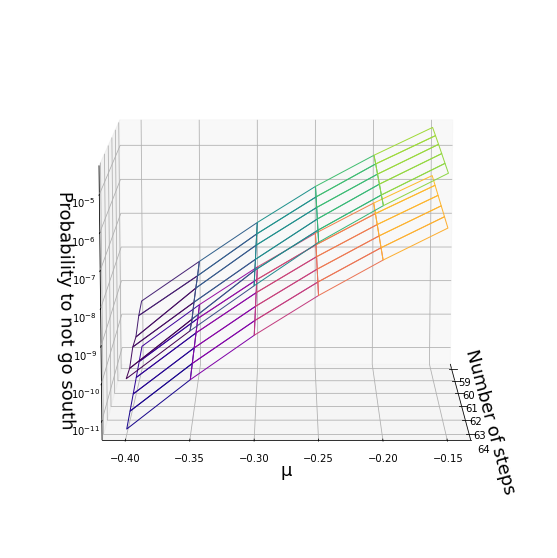

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

x, y = np.meshgrid(μs, steps)
z1 = np.log(relationship['Integral MC'].values.reshape((steps.size, μs.size)))
z2 = np.log(relationship['Integral formula'].values.reshape((steps.size, μs.size)))

norm1 = plt.Normalize(z1.min(), z1.max())
norm2 = plt.Normalize(z2.min(), z2.max())
colors1 = cm.viridis(norm1(z1))
colors2 = cm.plasma(norm2(z2))
rcount1, ccount1, _ = colors1.shape
rcount2, ccount2, _ = colors2.shape

surf1 = ax.plot_surface(y, x, z1,
                rcount=rcount1, ccount=ccount1, facecolors=colors1,
                shade=False)

surf2 = ax.plot_surface(y, x, z2,
                rcount=rcount2, ccount=ccount2, facecolors=colors2,
                shade=False)

surf1.set_facecolor((0,0,0,0))
surf2.set_facecolor((0,0,0,0))

ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_scale_z))

ax.view_init(20, -115)


ax.set_xlabel('Number of steps', fontsize=18)
ax.set_ylabel('μ', fontsize=18)
ax.set_zlabel('Probability to not go south', fontsize=18)
#plt.show()
def rotate(angle):
    ax.view_init(elev=10, azim=angle)
    
rot_animation = FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('rotation1.gif', dpi=80, writer='imagemagick')

In [6]:
steps = np.arange(3,9)
μs = np.arange(-1.5,-1.20001,0.05)
print("Progress bar")
display(fp)
count = steps.sum() * μs.size
i = 0
rows = steps.size * μs.size

relationship = pd.DataFrame({'Integral MC': np.zeros(rows), 'Integral formula': np.zeros(rows), '# steps': np.zeros(rows), 'μ': np.zeros(rows)})
row = 0

DeBill_equation = lambda μ, n: np.exp(-n * np.power(μ, 2) / 2.0) / (np.sqrt(2.0 * np.pi * n) * np.abs(μ) * n)

for step in steps:
    for μ in μs:
        sample = rng.normal(loc=μ, size=(sample_size, step))
        norm_L1 = sample.cumsum(axis=1)
        filter_L1 = np.all(norm_L1 > 0.0, axis=1)
        relationship.iloc[row] = filter_L1.mean(), DeBill_equation(μ, step), step, μ
        i += step
        fp.value = 100.0 * i / count
        row += 1

Progress bar


FloatProgress(value=100.0)

In [7]:
print(relationship)

        Integral MC  Integral formula          # steps                 μ
0  0.00217833333333  0.00175143106409 3.00000000000000 -1.50000000000000
1  0.00283933333333  0.00226049712598 3.00000000000000 -1.45000000000000
2  0.00362300000000  0.00289917460105 3.00000000000000 -1.40000000000000
3  0.00459666666667  0.00369523340546 3.00000000000000 -1.35000000000000
4  0.00579266666667  0.00468110432188 3.00000000000000 -1.30000000000000
5  0.00730466666667  0.00589441187029 3.00000000000000 -1.25000000000000
6  0.00047700000000  0.00036932070099 4.00000000000000 -1.50000000000000
7  0.00068333333333  0.00051314934653 4.00000000000000 -1.45000000000000
8  0.00097766666667  0.00070673674848 4.00000000000000 -1.40000000000000
9  0.00132333333333  0.00096490137171 4.00000000000000 -1.35000000000000
10 0.00174600000000  0.00130605473401 4.00000000000000 -1.30000000000000
11 0.00238533333333  0.00175283004936 4.00000000000000 -1.25000000000000
12 0.00012800000000  0.00008579408357 5.00000000000

MovieWriter imagemagick unavailable; using Pillow instead.


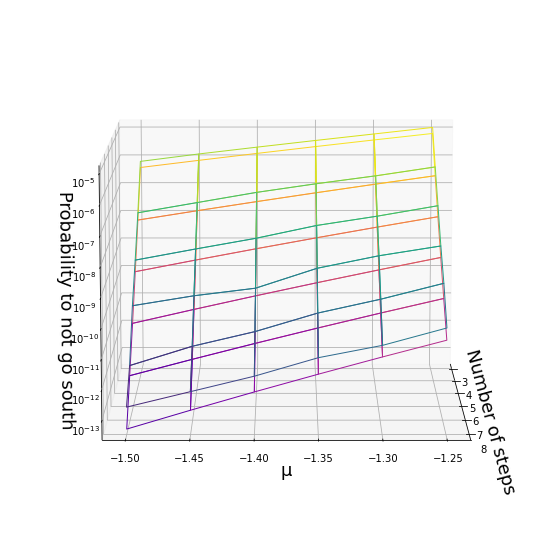

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

x, y = np.meshgrid(μs, steps)
z1 = np.log(relationship['Integral MC'].values.reshape((steps.size, μs.size)))
z2 = np.log(relationship['Integral formula'].values.reshape((steps.size, μs.size)))

norm1 = plt.Normalize(z1.min(), z1.max())
norm2 = plt.Normalize(z2.min(), z2.max())
colors1 = cm.viridis(norm1(z1))
colors2 = cm.plasma(norm2(z2))
rcount1, ccount1, _ = colors1.shape
rcount2, ccount2, _ = colors2.shape

surf1 = ax.plot_surface(y, x, z1,
                rcount=rcount1, ccount=ccount1, facecolors=colors1,
                shade=False)

surf2 = ax.plot_surface(y, x, z2,
                rcount=rcount2, ccount=ccount2, facecolors=colors2,
                shade=False)

surf1.set_facecolor((0,0,0,0))
surf2.set_facecolor((0,0,0,0))

ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_scale_z))

ax.view_init(20, -115)


ax.set_xlabel('Number of steps', fontsize=18)
ax.set_ylabel('μ', fontsize=18)
ax.set_zlabel('Probability to not go south', fontsize=18)
#plt.show()
def rotate(angle):
    ax.view_init(elev=10, azim=angle)
    
rot_animation = FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('rotation2.gif', dpi=80, writer='imagemagick')